# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [2]:
pip install ISLP

  Using cached ISLP-0.3.22-py3-none-any.whl (3.6 MB)
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl (10.3 MB)
  Using cached lifelines-0.28.0-py3-none-any.whl (349 kB)
  Using cached pygam-0.9.1-py3-none-any.whl (522 kB)
  Using cached torch-2.3.0-cp311-cp311-win_amd64.whl (159.8 MB)
  Using cached pytorch_lightning-2.2.5-py3-none-any.whl (802 kB)
  Using cached torchmetrics-1.4.0.post0-py3-none-any.whl (868 kB)
  Using cached autograd-1.6.2-py3-none-any.whl (49 kB)
  Using cached autograd_gamma-0.5.0-py3-none-any.whl
  Using cached formulaic-1.0.1-py3-none-any.whl (94 kB)
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
  Using cached pygam-0.9.0-py3-none-any.whl (522 kB)
  Using cached progressbar2-4.4.2-py3-none-any.whl (56 kB)
  Using cached lightning_utilities-0.11.2-py3-none-any.whl (26 kB)
  Using cached typing_extensions-4.12.1-py3-none-any.whl (37 kB)
  Using cached mkl-2021.4.0

ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [10]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

ModuleNotFoundError: No module named 'ISLP'

In [23]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

NameError: name 'load_data' is not defined

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

_(ii)_ What concept ‘defines’ the plotted line?

(i)medv (Median value of owner-occupied homes in $1000s): This is the target variable in the dataset, representing the median value of owner-occupied homes in the Boston area. It is often used as the dependent variable in regression analyses.

dis (Weighted distances to five Boston employment centers): This is an independent variable in the dataset, indicating the weighted distance from the residential area to the five major employment centers in Boston. This variable can be used to study the influence of accessibility to employment centers on the housing prices.

(ii) The concept that "defines" the plotted line in the context of a scatter plot with a line is typically linear regression

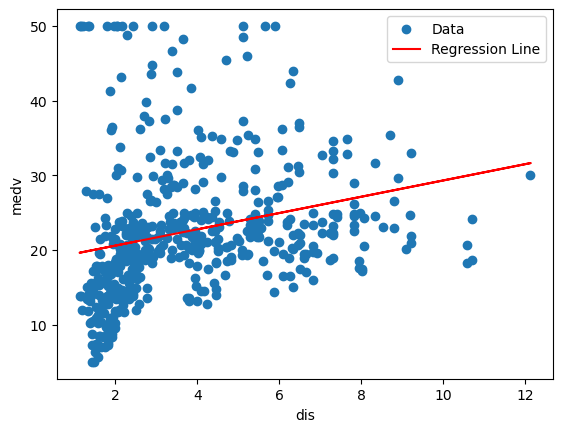

In [21]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

Null Hypothesis (H₀):
The null hypothesis states that there is no linear relationship between dis and medv. In other words, the slope of the regression line is zero.
𝐻0  : β1 = 0 This implies that changes in dis do not affect medv.

Alternative Hypothesis (H₁):
The alternative hypothesis states that there is a linear relationship between dis and medv. In other words, the slope of the regression line is not zero.



In [24]:
import statsmodels.api as sm
import pandas as pd

# URL to the Boston Housing Dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Load the dataset
Boston = pd.read_csv(url)

# Prepare the data
Y = Boston['medv']  # Response variable
X = Boston['dis']   # Predictor variable

# Add a constant to the predictor variable (for the intercept term)
X = sm.add_constant(X)

# Fit the simple regression model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        19:44:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  


In [ ]:
# Your answer here
(v) Intercept (const): B0 = 18.3901 

    Slope (dis): B1= 1.0916

(vi) Standard Error for Intercept (const): std err = 0.817
     Standard Error for Slope (dis): std err = 0.188

(vii) Confidence Interval for Intercept (const): [16.784, 19.996]
      Confidence Interval for Slope (dis): [0.722, 1.462]


Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  
_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

(viii) In this case, the 𝑅2 value is 0.062 and the adjusted 𝑅2 value is 0.061.
These values indicate that approximately 6.2% of the variance in the dependent variable (medv, median home value) is explained by the independent variable (
dis, distance to employment centers), which is quite low.
Additionally, the adjusted 𝑅2 takes into account the number of predictors in the model, providing a slightly more conservative estimate of the model's explanatory power.
Given the low 𝑅2 and adjusted 𝑅2 values, we can conclude that the model does not explain a significant amount of the variability in the median home values. This suggests that there are other factors not included in the model that are influencing home values.
Therefore, based solely on the 𝑅2 and adjusted 𝑅2 values, we would not consider this model to be a good fit for explaining median home values.

(ix) Yes, we reject the implied null hypothesis based on the model's F-statistic and its associated p-value.
     The F-statistic assesses the overall significance of the model by comparing the variability explained by the model to the variability not explained by the model. In this case, the F-statistic is 33.58, indicating that the model explains a significant amount of variance in the response variable.
     Additionally, the p-value associated with the F-statistic is 1.21 × 10−8,  which is extremely low. This indicates strong evidence against the null hypothesis that the model coefficients are all equal to zero, i.e., the model has no explanatory power.
     Therefore, based on the very low p-value of the F-statistic, we reject the null hypothesis, concluding that the model as a whole is statistically significant in explaining the variability in median home values.


### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [17]:
(i)
import statsmodels.api as sm
import pandas as pd



# Prepare the predictor variables (X1 and X2) and the response variable (Y)
X = Boston[['dis', 'rm']]  # Predictor variables
Y = Boston['medv']         # Response variable

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        19:09:50   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.0

_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

(ii) Null Hypothesis (H₀):
                          There is no linear relationship between the predictor variables (dis and rm) and the response variable (medv).
                          Mathematically, this can be expressed as: 𝐻0:𝛽1=𝛽2=0, where 𝛽1  and 𝛽2  are the coefficients of dis and rm, respectively.
    Alternative Hypothesis (H₁):There is a linear relationship between at least one of the predictor variables (dis and rm) and the response variable (medv).
                          Mathematically, this can be expressed as: 𝐻1: At least one of 𝛽1 or 𝛽2 is not equal to 0.
    
   In other words, the null hypothesis states that neither dis nor rm has a significant effect on medv, while the alternative hypothesis states that at least one of them has a significant effect on medv.

(iii) Based on the model output summary, both dis and rm are statistically significant predictors of medv. The coefficients for both variables have p-values less than 0.05, indicating that they have a significant impact on the median home value. Additionally, the confidence intervals for both coefficients do not include zero, further supporting their significance in predicting medv. Therefore, we can conclude that both dis and rm are predictive of medv.

(iv) In the "Residuals vs. Fitted" plot: Outliers are data points that fall far away from the main cluster of points or show a systematic pattern of deviation from the horizontal line at zero.
Outliers in this plot are observations with large vertical distances from the horizontal line at zero.
The impact of outliers on our model can be significant:

Influence on Model Parameters: Outliers can distort the estimation of model parameters, leading to biased coefficient estimates.
Impact on Model Fit: Outliers can affect the overall fit of the model, leading to a decrease in model performance (e.g., reduction in 𝑅2  value).
Decreased Predictive Accuracy: Outliers can lead to less accurate predictions, especially if they represent data points that are not representative of the underlying population.
Violation of Assumptions: Outliers may violate the assumptions of linear regression, such as normality and homoscedasticity, leading to unreliable inferences.


eval_env: 1


c:\Users\yingl\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:429: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


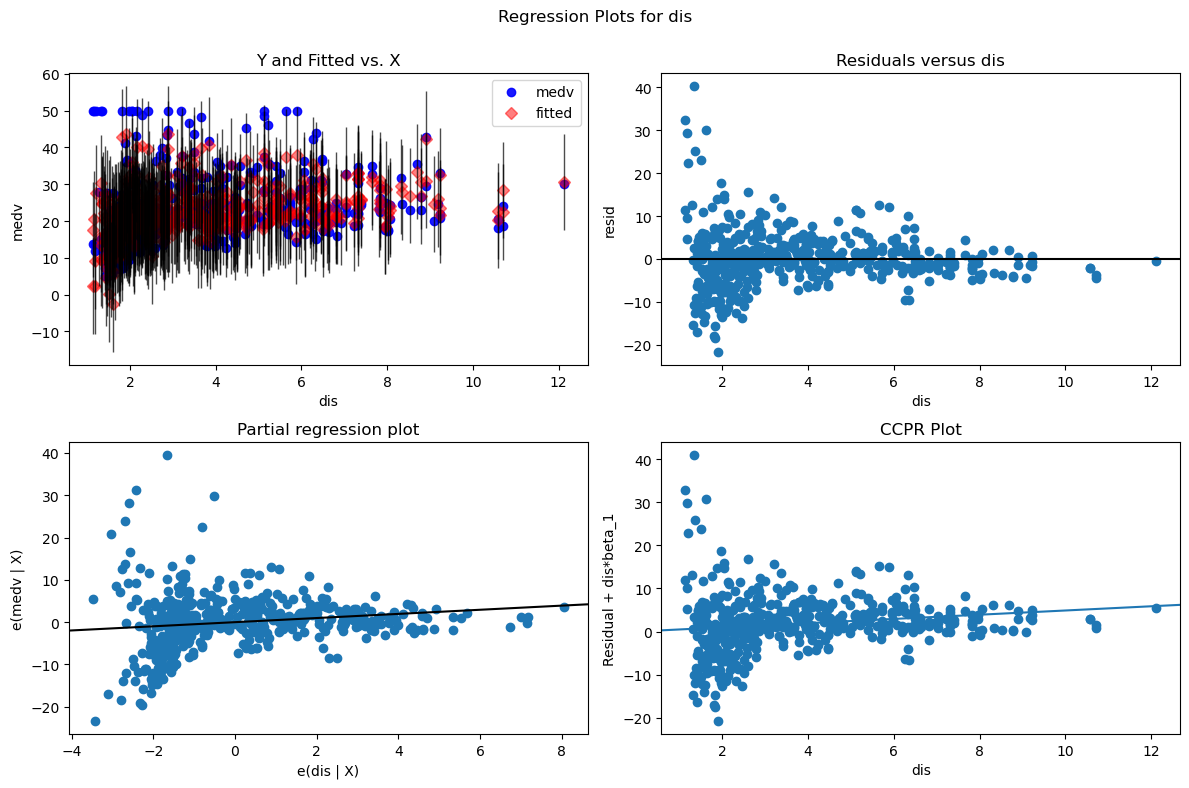

In [18]:
# Add your code here
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'X' is the predictor matrix and 'Y' is the response variable from the multiple regression model
model = sm.OLS(Y, X)
results = model.fit()

# Generate the diagnostic plots
fig = sm.graphics.plot_regress_exog(results, 'dis', fig=plt.figure(figsize=(12, 8)))

# Show the plot
plt.show()


_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

(v) If the interaction term (dis_rm_interaction) is statistically significant, it suggests that the relationship between dis and medv is not constant across different levels of rm. In the context of the Boston dataset, this could mean that the effect of distance to employment centers (dis) on median home value (medv) depends on the number of rooms per dwelling (rm). For example, the negative impact of distance on home value may be mitigated by a higher number of rooms in a dwelling.

In [19]:
# Add your code here
import statsmodels.api as sm
import pandas as pd



X = Boston[['dis', 'rm']]  # Predictor variables
Y = Boston['medv']         # Response variable

# Add interaction term (dis * rm)
X['dis_rm_interaction'] = X['dis'] * X['rm']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Fit the multiple linear regression model with interaction
model_interaction = sm.OLS(Y, X)
results_interaction = model_interaction.fit()

# Print the summary of the regression results
print(results_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           8.37e-79
Time:                        19:38:17   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -15.2533      4

C:\Users\yingl\AppData\Local\Temp\ipykernel_26760\4012391335.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dis_rm_interaction'] = X['dis'] * X['rm']


# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
